In [32]:
from phathom import io
import os

In [33]:
working_dir = '/media/jswaney/Drive/Justin/organoid_etango_small'

In [34]:
syto16_img = io.tiff.imread(os.path.join(working_dir, 'syto16.tif'))

In [35]:
syto16_zarr = io.zarr.new_zarr(os.path.join(working_dir, 'syto16.zarr'), 
                               syto16_img.shape,
                               chunks=(64, 64, 64),
                               dtype=syto16_img.dtype)

In [36]:
syto16_zarr[:] = syto16_img

In [37]:
del syto16_img

In [38]:
sox2_img = io.tiff.imread(os.path.join(working_dir, 'sox2.tif'))

In [39]:
sox2_zarr = io.zarr.new_zarr(os.path.join(working_dir, 'sox2.zarr'), 
                             sox2_img.shape,
                             chunks=(64, 64, 64),
                             dtype=sox2_img.dtype)

In [40]:
sox2_zarr[:] = sox2_img

In [41]:
del sox2_img

In [42]:
tbr1_img = io.tiff.imread(os.path.join(working_dir, 'tbr1.tif'))

In [43]:
tbr1_zarr = io.zarr.new_zarr(os.path.join(working_dir, 'tbr1.zarr'), 
                             tbr1_img.shape,
                             chunks=(64, 64, 64),
                             dtype=tbr1_img.dtype)

In [44]:
tbr1_zarr[:] = tbr1_img

In [45]:
del tbr1_img

Move these chunked arrays to subfolder called `1_1_1` as first mipmap level

In [16]:
import zarr
from precomputed_tif import ZarrStack

In [18]:
src_path = 'syto16.zarr/1_1_1'
dest_path = 'syto16.zarr'

src = zarr.NestedDirectoryStore(os.path.join(working_dir, src_path))
dest = os.path.join(working_dir, dest_path)
syto16_stack = ZarrStack(src, dest)

In [19]:
src_path = 'sox2.zarr/1_1_1'
dest_path = 'sox2.zarr'

src = zarr.NestedDirectoryStore(os.path.join(working_dir, src_path))
dest = os.path.join(working_dir, dest_path)
sox2_stack = ZarrStack(src, dest)

In [20]:
n_levels = 4

syto16_stack.write_info_file(n_levels)
sox2_stack.write_info_file(n_levels)

for level in range(2, n_levels+1):
    syto16_stack.write_level_n(level)
    sox2_stack.write_level_n(level)

100%|██████████| 162/162 [00:05<00:00, 29.99it/s]


In [30]:
syto16_8x = zarr.open(os.path.join(working_dir, 'syto16.zarr/4_4_4'))

In [31]:
img = syto16_8x[:]
img.max()

0

In [24]:
import matplotlib.pyplot as plt

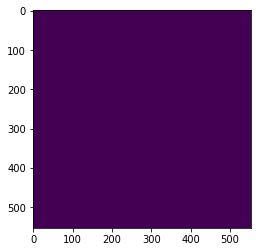

In [28]:
plt.imshow(img[20], clim=[0, 1])
plt.show()